In [52]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score,confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load the dataset
data = pd.read_csv('/home/rguktrkvalley/Desktop/Stackoverflow-Analysis/Data/survey_results_sample_2018.csv')

In [38]:
data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [39]:
data.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

In [40]:
columns = [
    'Employment', 'FormalEducation', 'CompanySize', 'DevType', 'Exercise', 'Age', 'OpenSource'
]


In [41]:
data = data[columns].copy()

In [42]:
data.head()

,Employment,FormalEducation,CompanySize,DevType,Exercise,Age,OpenSource
0,Employed part-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",20 to 99 employees,Full-stack developer,3 - 4 times per week,25 - 34 years old,No
1,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","10,000 or more employees",Database administrator;DevOps specialist;Full-...,Daily or almost every day,35 - 44 years old,Yes
2,Employed full-time,Associate degree,20 to 99 employees,Engineering manager;Full-stack developer,NaN,NaN,Yes
3,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",100 to 499 employees,Full-stack developer,I don't typically exercise,35 - 44 years old,No
4,Employed full-time,Some college/university study without earning ...,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,3 - 4 times per week,18 - 24 years old,No


In [43]:
age_mapping = {
    'Under 18 years old': 0,
    '18 - 24 years old': 1,
    '25 - 34 years old': 2,
    '35 - 44 years old': 3,
    '45 - 54 years old': 4,
    '55 - 64 years old': 5,
    '65 years or older': 6
}

In [44]:
data.loc[:, 'Age'] = data['Age'].map(age_mapping)

In [45]:
# Specify the target variable and feature columns
target_variable = 'OpenSource'
categorical_features = ['Employment', 'FormalEducation', 'CompanySize', 'DevType', 'Exercise','Age']
numerical_features = []

In [46]:
# Preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [47]:
X = data.drop(target_variable, axis=1)
y = data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Creating pipeline and training model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [49]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Employment',
                                                   'FormalEducation',
                                                   'CompanySize', 'DevType',
                                                   'Exercise', 'Age'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [50]:
# Evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

          No       0.83      0.36      0.50        14
         Yes       0.36      0.83      0.50         6

    accuracy                           0.50        20
   macro avg       0.60      0.60      0.50        20
weighted avg       0.69      0.50      0.50        20

ROC-AUC Score: 0.7142857142857143


In [51]:
# Feature importance
importances = model.named_steps['classifier'].feature_importances_
feature_names = list(model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out())
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                                              Feature  Importance
74                      Exercise_1 - 2 times per week    0.036055
11                   CompanySize_100 to 499 employees    0.035641
76                 Exercise_Daily or almost every day    0.035033
3   FormalEducation_Bachelor‚Äôs degree (BA, BS, B...    0.034483
12                     CompanySize_20 to 99 employees    0.033110
..                                                ...         ...
56  DevType_Database administrator;Full-stack deve...    0.003156
24  DevType_Back-end developer;Data scientist or m...    0.002218
60  DevType_Designer;Front-end developer;QA or tes...    0.002116
48  DevType_Back-end developer;Front-end developer...    0.001994
39  DevType_Back-end developer;Desktop or enterpri...    0.001451

[84 rows x 2 columns]


In [53]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

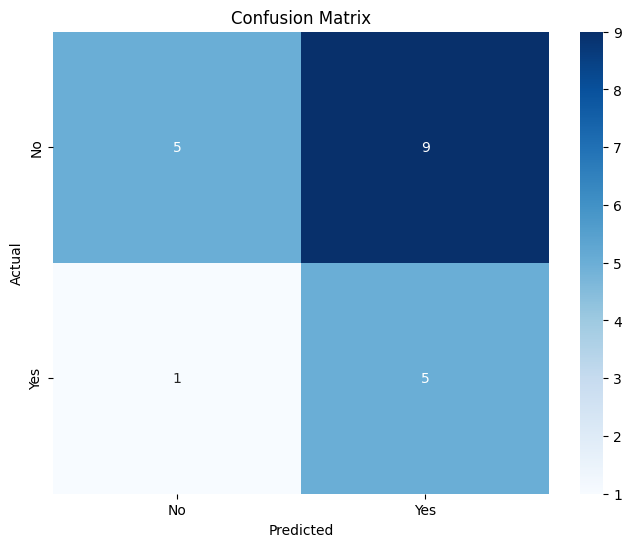

In [54]:
# plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred)

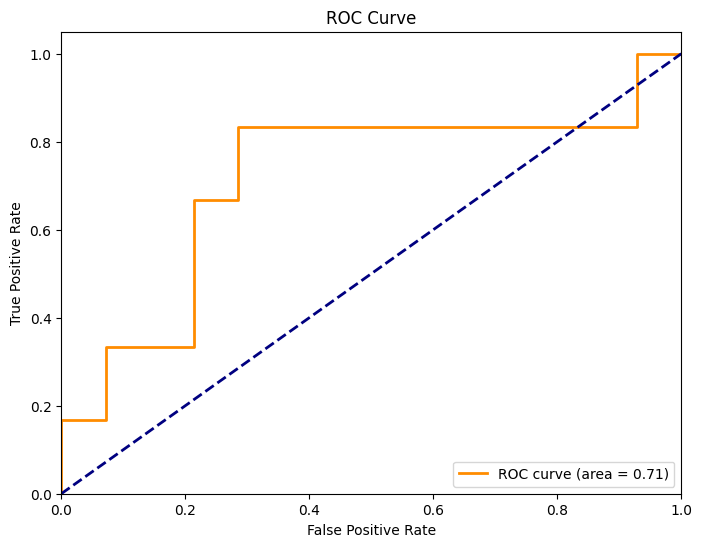

In [58]:
# ROC Curve
# Encode 'No' as 0 and 'Yes' as 1 for the ROC curve
y_test_binary = y_test.map({'No': 0, 'Yes': 1})
def plot_roc_curve(y_true, y_prob, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(y_test_binary, y_prob)


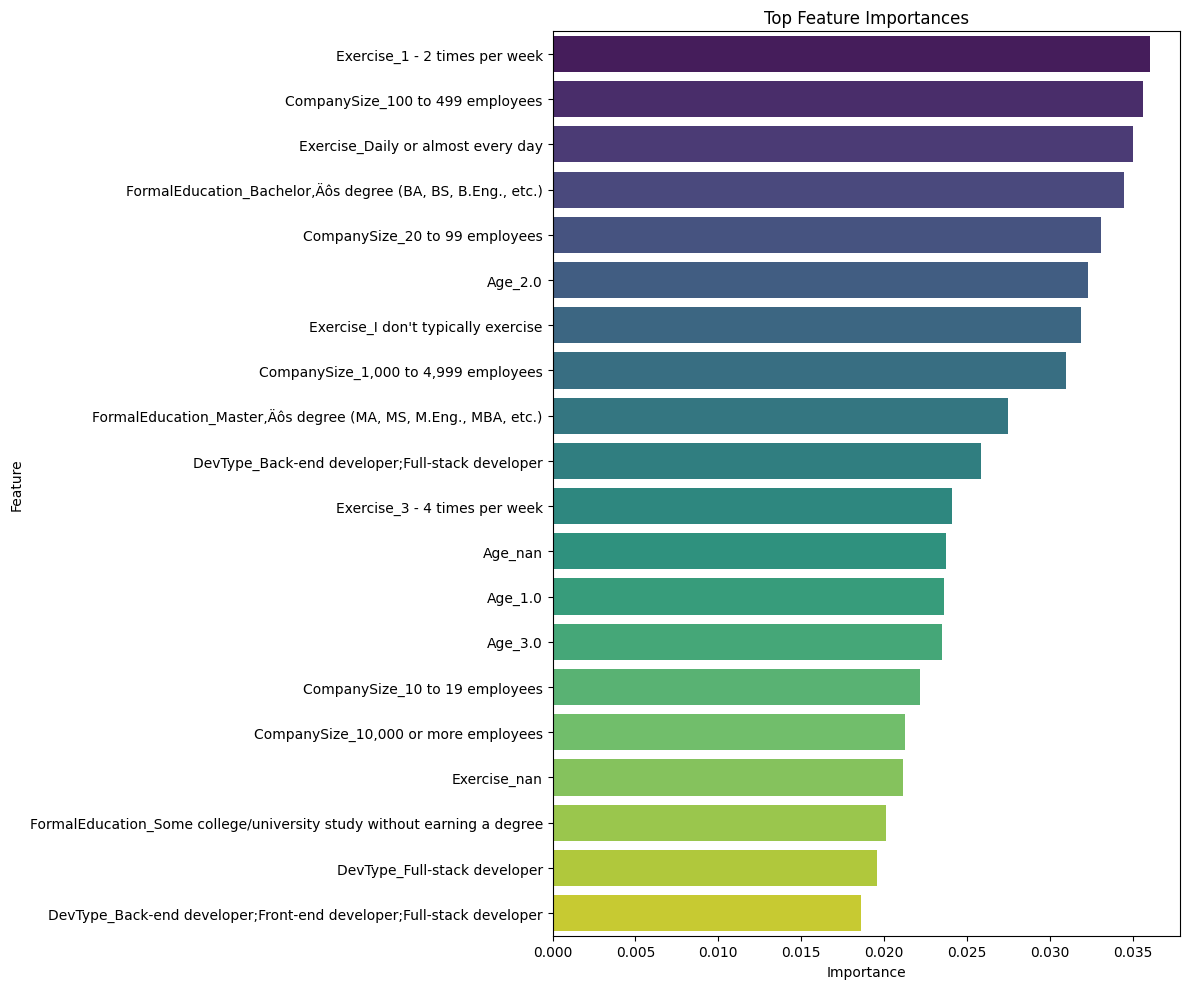

In [59]:
# Feature Importance
def plot_feature_importance(feature_importance_df, top_n=20, title='Top Feature Importances'):
    # Sort the features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)
    
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

plot_feature_importance(feature_importance_df)